# Q4. Horse race

In a five-horse race, the following table sets out the decimal odds for each horse to win the race. 

What should the price be for an exact 1 2 3 finish based on Horse A coming 2nd, Horse B coming 3rd and Horse C winning?

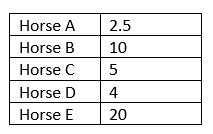

In [1]:
import pandas as pd
import numpy as np
from numpy import random

In [2]:
decimal_odds = [2.5, 10, 5, 4, 20]

decimal_first = {'decimal_1st': decimal_odds} 
decimal_first

{'decimal_1st': [2.5, 10, 5, 4, 20]}

In [3]:
prob = pd.DataFrame(decimal_first)
prob

,decimal_1st
0,2.5
1,10.0
2,5.0
3,4.0
4,20.0


In [4]:
proba = lambda x: 1/x

prob['prob_1st'] = prob['decimal_1st'].apply(proba)
prob

,decimal_1st,prob_1st
0,2.5,0.40
1,10.0,0.10
2,5.0,0.20
3,4.0,0.25
4,20.0,0.05


In [5]:
# Check sum of probabilities is 1

sum_prob = 0
for i in range(len(prob)) : 
  sum_prob += prob.loc[i, "prob_1st"]

sum_prob

1.0

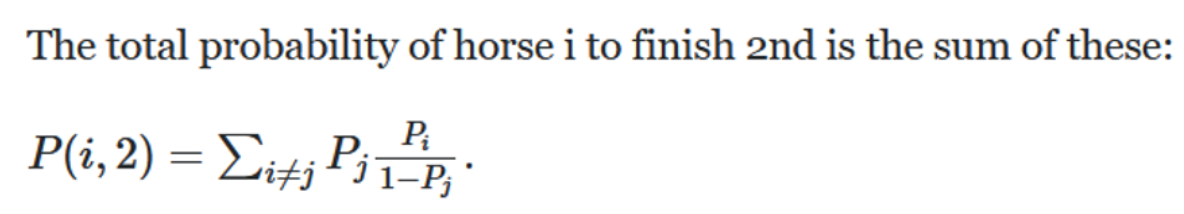

In [6]:
# probability table with new prob_2nd column
for i in range(len(prob)) : 
    sum = 0
    for j in range(len(prob)):
        if i == j:
            continue
        sum += prob.loc[j, "prob_1st"] / (1 - prob.loc[j, "prob_1st"])
    prob.loc[i, "prob_2nd"] = prob.loc[i, "prob_1st"] * sum

prob

,decimal_1st,prob_1st,prob_2nd
0,2.5,0.40,0.298830
1,10.0,0.10,0.130263
2,5.0,0.20,0.232749
3,4.0,0.25,0.270102
4,20.0,0.05,0.068056


In [7]:
# Check sum of probabilities is 1

sum_prob = 0
for i in range(len(prob)) : 
  sum_prob += prob.loc[i, "prob_2nd"]

sum_prob

1.0

# The total probability of horse i to finish 3rd is the sum of these:
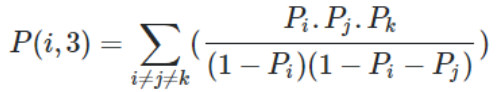


In [8]:
for i in range(len(prob)) : 
    sum = 0
    for j in range(len(prob)):
        if i == j:
            continue
        for k in range (len(prob)):
            if (j == k) or (i == k):
                continue
            sum += (prob.loc[i, "prob_1st"] * prob.loc[j, "prob_1st"] * prob.loc[k, "prob_1st"]) / \
            ((1 - prob.loc[i, "prob_1st"]) * (1 - prob.loc[i, "prob_1st"] - prob.loc[j, "prob_1st"]))
    prob.loc[i, "prob_3rd"] = sum
prob

,decimal_1st,prob_1st,prob_2nd,prob_3rd
0,2.5,0.40,0.298830,0.40
1,10.0,0.10,0.130263,0.10
2,5.0,0.20,0.232749,0.20
3,4.0,0.25,0.270102,0.25
4,20.0,0.05,0.068056,0.05


In [9]:
# Check sum of probabilities is 1
sum_prob = 0
for i in range(len(prob)) : 
  sum_prob += prob.loc[i, "prob_3rd"]
sum_prob

1.0000000000000002

In [10]:
# Solution

solution_prob = prob.loc[2, "prob_1st"] * prob.loc[0, "prob_2nd"] * prob.loc[1, "prob_3rd"]

solution_decimal = 1 / solution_prob

print("The probability of Horse A coming 2nd, Horse B coming 3rd and Horse C winning is:", round(solution_prob, 3))
print("For which the corresponding decimal odds is:", round(solution_decimal,2))

The probability of Horse A coming 2nd, Horse B coming 3rd and Horse C winning is: 0.006
For which the corresponding decimal odds is: 167.32
